## Data science homework 4
資工二 110590034 楊榮鈞

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#請用絕對位置，相對路徑會導向安裝anaconda的地方
data = pd.read_csv('D:\\jupyter\\data_science\\hw3\\data_science_hw3.csv',index_col=0)
#提取資料
data = data[['date','證券名稱','收盤價']]
#更改名字
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})
#清理資料
data['closing_price'] = data['closing_price'].replace({'\$':'', ',':'', '--':np.nan}, regex=True)
data = data.dropna()
#更改資料型態
data['closing_price'] = data['closing_price'].astype('float64')
data['date'] = pd.to_datetime(data['date'])
data

,date,name,closing_price
0,2022-01-03,元大台灣50,146.40
1,2022-01-03,元大中型100,60.90
2,2022-01-03,富邦科技,135.20
3,2022-01-03,元大電子,70.45
4,2022-01-03,元大台商50,31.80
...,...,...,...
1176,2022-12-30,新麗,20.45
1177,2022-12-30,潤泰新,43.25
1178,2022-12-30,三發地產,12.20
1179,2022-12-30,佳龍,19.80


In [2]:
data_group = data.groupby('name')

data_TSMC_mean = data_group.get_group('台積電').drop('date',axis = 1).mean()
data_MTK_mean = data_group.get_group('聯發科').drop('date',axis = 1).mean()
data_UMC_mean = data_group.get_group('聯電').drop('date',axis = 1).mean()

print('台積電 : ',data_TSMC_mean)
print('聯發科 : ',data_MTK_mean)
print('聯電 : ',data_UMC_mean)

台積電 :  closing_price    516.24187
dtype: float64
聯發科 :  closing_price    786.963415
dtype: float64
聯電 :  closing_price    46.180691
dtype: float64


In [3]:
#提出台積電的資料
data_TSMC = data[data['name']=='台積電'].reset_index(drop=True)
#製作一個新的dataframe去接資料
data_TSMC_corr_company = pd.DataFrame()
#製作所有公司的list，方法 : 將data的name這個columns刪除重複項
companies = data['name'].drop_duplicates()
data_TSMC_corr_company['company'] = companies
data_TSMC_corr_company['corr'] = 0

#利用apply遍歷所有公司
def get_corr(x):
    data_company = data[data['name']==x].reset_index(drop=True)
    return data_TSMC['closing_price'].corr(data_company['closing_price'])
data_TSMC_corr_company['corr'] = data_TSMC_corr_company['company'].apply(get_corr)

#絕對值並排續後的相關度dataframe
data_TSMC_corr_company['corr'] = data_TSMC_corr_company['corr'].abs()
data_TSMC_corr_comp_sort = data_TSMC_corr_company.sort_values('corr',ascending = False).head(11)
data_TSMC_corr_comp_sort

,company,corr
438,台積電,1.000000
9,元大MSCI台灣,0.993237
0,元大台灣50,0.992676
3,元大電子,0.992649
16,元大台灣50正2,0.989792
14,富邦台50,0.989177
58,富邦臺灣加權正2,0.988492
121,國泰台灣5G+,0.985992
155,元大台股領航N,0.985578
47,國泰臺灣加權正2,0.984245


與台積電絕對值相關度排行第10名的股票是永豐智能車供應鏈


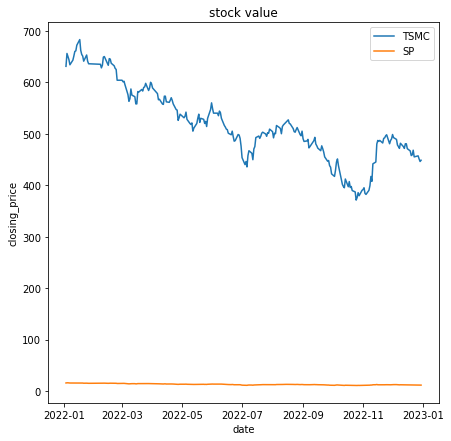

In [4]:
print("與台積電絕對值相關度排行第10名的股票是永豐智能車供應鏈")
data_SP = data[data['name']=='永豐智能車供應鏈'].reset_index(drop=True)

data_TSMC_SP = pd.merge(data_TSMC[['date','closing_price']],data_SP[['date','closing_price']],on='date',suffixes=('_TSMC', '_SP')).set_index('date')

plt.figure(figsize=(7,7))
plt.plot(data_TSMC_SP['closing_price_TSMC'],label='TSMC')
plt.plot(data_TSMC_SP['closing_price_SP'],label='SP')
plt.legend(loc='best')

plt.xlabel("date")
plt.ylabel("closing_price")
plt.title("stock value")
plt.show()